<a href="https://colab.research.google.com/github/gvosper25/3009ICT-Assignmnet/blob/main/3009ICT_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Processing and Visualization
-----
**Assignment Topic: Data Analysis on Car Advertisements**


Student1 Name: Georgia Vosper

SNumber: S5223182


# Data Import

In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import sqlite3
import seaborn as sns
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


In [2]:
car_data = pd.read_csv('/content/drive/MyDrive/3009ICT-Assignment/car_dataset.csv')
sellers_data = pd.read_csv('/content/drive/MyDrive/3009ICT-Assignment/seller_dataset.csv')

## a. Statistics Computation

# Data Formatting

## a. Numerical Conversion

List of colums that need to be cleaned & converted





In [3]:
cols_to_clean = [ 'mileage','num_of_doors','seating_capacity','fuel_consumption','price (AUD)']

Loops through each colums & extracts numbers from text. Converts to float

In [4]:
for col in cols_to_clean:
  car_data[col] = car_data[col].astype(str).str.extract(r'([\d.]+)').astype(float)

Run as a test

In [5]:
car_data[['mileage' , 'num_of_doors' , 'seating_capacity' , 'fuel_consumption' , 'price (AUD)']].head ()

,mileage,num_of_doors,seating_capacity,fuel_consumption,price (AUD)
0,0.0,2.0,2.0,100.0,10080.99411
1,0.0,5.0,7.0,10.0,161943.68050
2,0.0,5.0,8.0,100.0,35830.03930
3,0.0,5.0,5.0,100.0,30526.38376
4,0.0,5.0,8.0,100.0,34413.03209


## b. Engine Feature Split

Split into type & size

In [6]:
car_data[['type_of_engine','engine_capacity']]=car_data['engine'].str.extract(r'(\w+)\s*[\t]*\s*([\d.]+)\s*L')

Convert to float

In [7]:
car_data['engine_capacity']=car_data['engine_capacity'].astype(float)

Test

In [8]:
car_data[['engine','type_of_engine','engine_capacity']].head()

,engine,type_of_engine,engine_capacity
0,Petrol\t1.0 L,Petrol,1.0
1,Petrol\t3.4 L,Petrol,3.4
2,Petrol\t2.0 L,Petrol,2.0
3,Petrol\t1.8 L,Petrol,1.8
4,Petrol\t2.0 L,Petrol,2.0


## c. Standardizing Text Data

Convert to lower case

In [9]:
cols_to_lower = ['origin','condition','car_model','exterior_color', 'interior_color', 'type_of_engine',
'fuel_system', 'transmission', 'drive_type', 'brand','grade']


In [10]:
for col in cols_to_lower:
  car_data[col] = car_data[col].astype(str).str.lower()

Test run

In [11]:
car_data[['origin','condition','car_model','exterior_color', 'interior_color', 'type_of_engine',
'fuel_system', 'transmission', 'drive_type', 'brand','grade']].head ()

,origin,condition,car_model,exterior_color,interior_color,type_of_engine,fuel_system,transmission,drive_type,brand,grade
0,domestic assembly,new car,truck,white,gray,petrol,nan,manual,rfd - rear-wheel drive,suzuki,super carry truck
1,imported,new car,suv,black,black,petrol,nan,automatic,awd - 4-wheel drive (awd),toyota,land cruiser
2,domestic assembly,new car,crossover,silver,brown,petrol,nan,automatic,rfd - rear-wheel drive,toyota,innova
3,imported,new car,suv,white,black,petrol,nan,automatic,fwd - front-wheel drive,toyota,corolla cross
4,domestic assembly,new car,crossover,silver,gray,petrol,nan,automatic,rfd - rear-wheel drive,toyota,innova


## d. Numerical Scaling

Make columns to scale

In [12]:
columns_to_scale = ['engine_capacity', 'num_of_doors', 'seating_capacity', 'fuel_consumption','price (AUD)' ]

Start the scaler

In [13]:
scaler = MinMaxScaler()

Apply and add new columns

In [14]:
import re

for col in columns_to_scale:
  clean_name = re.sub(r'[^a-zA-Z0-9]','_',col).lower()
  new_col =f'normalised_{clean_name}'
  car_data[new_col] = scaler.fit_transform(car_data[[col]])

Run test

In [15]:
car_data[['normalised_engine_capacity','normalised_price__aud_']].describe()

,normalised_engine_capacity,normalised_price__aud_
count,29285.000000,30652.000000
mean,0.154511,0.019597
std,0.064822,0.035946
min,0.000000,0.000000
25%,0.111111,0.007500
50%,0.150794,0.011407
75%,0.182540,0.018500
max,1.000000,1.000000


Save as new CSV file

In [16]:
car_data.to_csv('/content/drive/MyDrive/3009ICT-Assignment/processed_car_dataset.csv', index = False)

# Data Exploration and Cleaning

## a. Statistics Computation

Columns required & Calculate basic statistics

In [17]:
import numpy as np

columns = ['price (AUD)','mileage','year_of_manufacture']

for col in columns:
  print(f"\n---{col}---")
  print("Mean:", car_data[col].mean())
  print("Median:",car_data[col].median())
  print("Mode:",car_data[col].mode().iloc[0])
  print("Standard Deviation:",car_data[col].std())
  print("Range:",car_data[col].max()-car_data[col].min())


---price (AUD)---
Mean: 42843.16554304759
Median: 24939.32679
Mode: 40485.92011
Standard Deviation: 78585.58399261319
Range: 2186239.6858785423

---mileage---
Mean: 42.11447866370873
Median: 20.0
Mode: 0.0
Standard Deviation: 74.87235716224309
Range: 999.0

---year_of_manufacture---
Mean: 2017.320346178968
Median: 2019.0
Mode: 2023.0
Standard Deviation: 5.3317724314591874
Range: 33.0


## b. Outliers and Missing Values

i)
Make a copy of the data before cleaning

In [18]:
before_cleaning_rows= car_data.shape[0]

Select columns

In [19]:
numeric_cols = car_data.select_dtypes(include='number').columns

loop to remove outliers using IQR method

In [20]:
for col in numeric_cols:
  Q1 = car_data[col].quantile(0.25)
  Q3 = car_data[col].quantile(0.75)
  IQR = Q3-Q1
  lower = Q1 - 1.5 * IQR
  upper = Q3 + 1.5 * IQR
  car_data = car_data[(car_data[col]>=lower)&(car_data[col]<=upper)]

Save new row count

In [21]:
after_cleaning_rows = car_data.shape[0]

print(f"Before cleaning: {before_cleaning_rows} rows")
print(f"After cleaning: {after_cleaning_rows} rows")
print(f"Rows removed: {before_cleaning_rows - after_cleaning_rows}")

Before cleaning: 30652 rows
After cleaning: 14610 rows
Rows removed: 16042


ii) Check for missing values

In [22]:
car_data.isnull().sum()

,0
ad_id,0
origin,0
condition,0
car_model,0
mileage,0
exterior_color,0
interior_color,0
num_of_doors,0
seating_capacity,0
engine,0


Show before and after

In [23]:
original_row_count = car_data.shape[0]
before_cleaning_rows = original_row_count
after_cleaning_rows = car_data.shape[0]
print(f"Before cleaning: {before_cleaning_rows}")
print(f"After cleaning: {after_cleaning_rows}")
print(f"Rows removed: {before_cleaning_rows-after_cleaning_rows}")

Before cleaning: 14610
After cleaning: 14610
Rows removed: 0


The dataset was clean with no missing values/outliers needing removal. Final number of rows remains unchanges after the cleaning.

# Data Storage

Pt a)

Import sqlite3 & connect to database

In [24]:
import sqlite3
import pandas as pd

conn = sqlite3.connect('cars_database.db')
cursor = conn.cursor()

Inset the data

In [25]:
car_data_subset = car_data[['ad_id','car_name','origin','condition','exterior_color','car_model','year_of_manufacture','transmission','price (AUD)','drive_type']].rename(columns={'price (AUD)':'price'})

car_data_subset.to_sql('cars',conn, if_exists='replace', index = False)


14610

Results

In [26]:
pd.read_sql_query("SELECT * FROM cars LIMIT 5", conn)

,ad_id,car_name,origin,condition,exterior_color,car_model,year_of_manufacture,transmission,price,drive_type
0,4664789,Toyota Yaris 1.5G 2016,imported,used car,white,hatchback,2016.0,automatic,17368.45973,fwd - front-wheel drive
1,4664930,Chevrolet Colorado LTZ 2.5L 4x4 AT 2019,imported,used car,yellow,4x4,2019.0,automatic,26923.13687,4wd - four-wheel drive (4wd)
2,4665042,Hyundai Tucson 2.0 ATH 2015,imported,used car,white,crossover,2015.0,automatic,26680.22135,fwd - front-wheel drive
3,4665290,Mazda CX5 2.0 AT 2017,domestic assembly,used car,white,suv,2017.0,automatic,26720.70727,fwd - front-wheel drive
4,4665362,VinFast Lux A 2.0 Advanced 2022 car,domestic assembly,new car,red,sedan,2022.0,automatic,33967.68697,rfd - rear-wheel drive


Pt b)

In [27]:
import sqlite3
import pandas as pd

In [28]:
conn = sqlite3.connect('cars_database.db')
cursor = conn.cursor()

In [29]:
file_path = '/content/drive/MyDrive/3009ICT-Assignment/seller_dataset.csv'
sellers_data = pd.read_csv (file_path)
sellers_data.columns = sellers_data.columns.str.strip()

In [30]:
seller_subset = sellers_data[['ad_id','name']].rename(columns={'name':'seller_name'})

seller_subset.to_sql('sellers', conn, if_exists='replace', index= False)

30652

Results

In [31]:
pd.read_sql_query("SELECT * FROM sellers LIMIT 5", conn)

,ad_id,seller_name
0,17042,Suzuki - Sydney
1,53794,Toyota - Melbourne
2,73954,Toyota - Brisbane
3,74150,Toyota - Perth
4,87573,Toyota - Adelaide


pt c)

query to join tables

In [32]:
query = """ SELECT cars.ad_id, cars.car_name, cars.price, sellers.seller_name FROM cars JOIN sellers ON cars.ad_id = sellers.ad_id """

In [33]:
result = pd.read_sql_query(query, conn)

Results

In [34]:
result.head()

,ad_id,car_name,price,seller_name
0,4664789,Toyota Yaris 1.5G 2016,17368.45973,Toyota - Wollongong
1,4664930,Chevrolet Colorado LTZ 2.5L 4x4 AT 2019,26923.13687,Chevrolet - Geelong
2,4665042,Hyundai Tucson 2.0 ATH 2015,26680.22135,Hyundai - Townsville
3,4665290,Mazda CX5 2.0 AT 2017,26720.70727,Mazda - Burnie
4,4665362,VinFast Lux A 2.0 Advanced 2022 car,33967.68697,VinFast - Bunbury


# Data Visualization

i) mileage and price

In [35]:
car_data['price (AUD)'] = pd.to_numeric(car_data['price (AUD)'],errors='coerce')

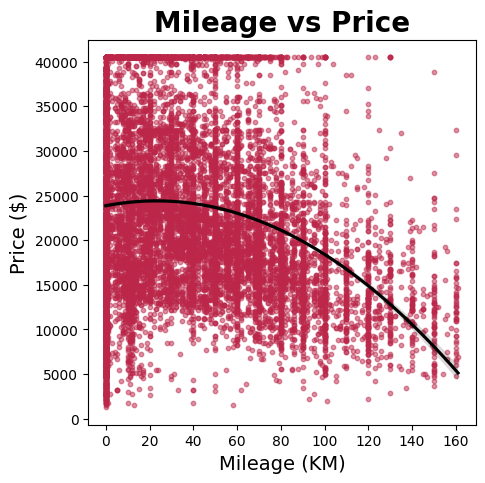

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(5,5))

car_data = car_data.dropna(subset=['price (AUD)'])
car_data=car_data[car_data['price (AUD)']>1000]

sns.regplot(data = car_data, x='mileage', y='price (AUD)', scatter_kws={'s':10, 'alpha':0.5, 'color':'#BB2649'}, order=2, line_kws={"color":"black"})


plt.title("Mileage vs Price", fontsize=20, weight='bold')
plt.xlabel ("Mileage (KM)", fontsize=14)
plt.ylabel ("Price ($)", fontsize=14)

plt.show()

Observation:

From the scatter plot, it can be seen that cars with a lower mileage usually cost more. As the mileage goes up the price tends to drop. Even though there is a lot of variation the overall trend shows that the higher the mileage  typicaly means the cheaper the car. *italicized text*

ii) **Trend of car prices over the year of manufacture**

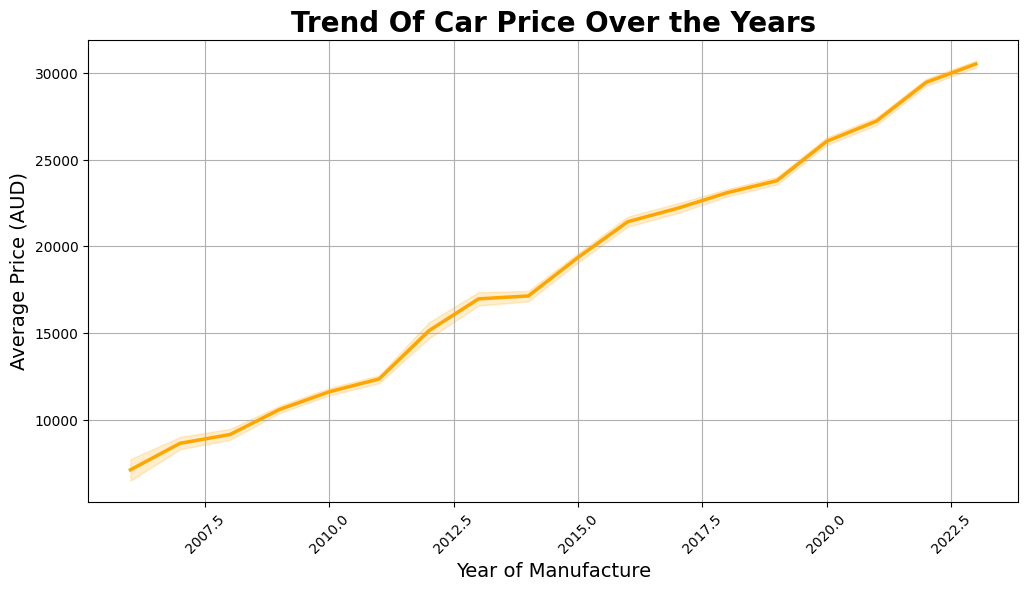

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.lineplot(data=car_data, x='year_of_manufacture', y='price (AUD)', estimator='mean', errorbar=('ci',68), color='orange', linewidth=2.5)

plt.title("Trend Of Car Price Over the Years", fontsize = 20, weight ='bold')
plt.xlabel("Year of Manufacture",fontsize = 14)
plt.ylabel("Average Price (AUD)",fontsize = 14)

plt.grid (True)
plt.xticks(rotation=45)


plt.show()

Observation:

The line chart shows a clear upward trend in the average car prices from around 2006 to 2023. This suggests that newer cars tend to be more expensive. The price increases more rapidy after 2011, with a sharper increase from 2019 onwards.

iii) **Average prices among diffrent car models**

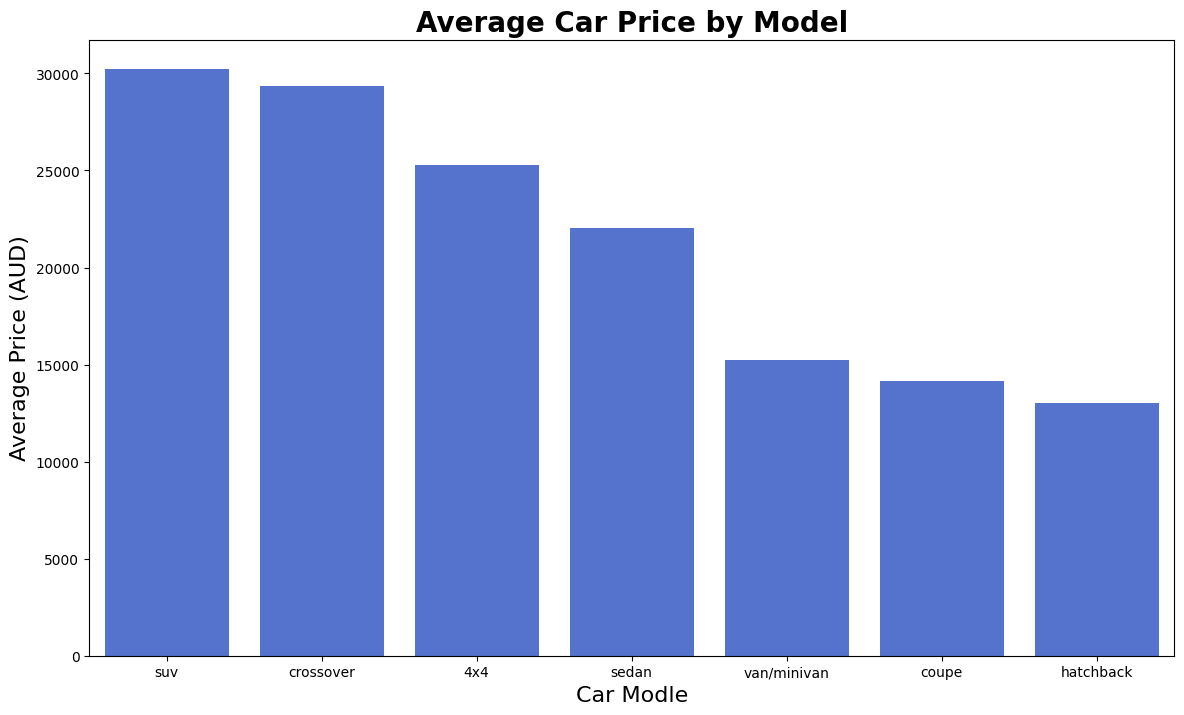

In [100]:
avg_prices=car_data.groupby('car_model')['price (AUD)'].mean().sort_values(ascending=False).reset_index()
plt.figure(figsize=(14,8))
sns.barplot(data=avg_prices, x='car_model', y='price (AUD)', color='royalblue')

plt.title("Average Car Price by Model", fontsize=20,weight ='bold')
plt.xlabel ("Car Modle", fontsize=16)
plt.ylabel("Average Price (AUD)", fontsize=16)

plt.show()

SUVs and crossovers have the highest average price, posibly due to their size and popularity. hatchbacks and coupes are the most affordable. This graph suggests that car models sugnifficantly affects the price with larger vechiles costing more.

iv) **Distribution of engine capacity**